In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('datasets/dogImages/train/')
valid_files, valid_targets = load_dataset('datasets/dogImages/valid/')
test_files, test_targets = load_dataset('datasets/dogImages/test/')

# load list of dog names
dog_names = [item[31:-1] for item in sorted(glob("./datasets/dogImages/train/*/"))]
print(list(dog_names))

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.
D:\Users\giann\miniconda3\envs\dog-app\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\giann\miniconda3\envs\dog-app\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\giann\miniconda3\envs\dog-app\lib\site-packages\tensorflow\python\framework\dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\giann\miniconda3\envs\dog-app

['Affenpinscher', 'Afghan_hound', 'Airedale_terrier', 'Akita', 'Alaskan_malamute', 'American_eskimo_dog', 'American_foxhound', 'American_staffordshire_terrier', 'American_water_spaniel', 'Anatolian_shepherd_dog', 'Australian_cattle_dog', 'Australian_shepherd', 'Australian_terrier', 'Basenji', 'Basset_hound', 'Beagle', 'Bearded_collie', 'Beauceron', 'Bedlington_terrier', 'Belgian_malinois', 'Belgian_sheepdog', 'Belgian_tervuren', 'Bernese_mountain_dog', 'Bichon_frise', 'Black_and_tan_coonhound', 'Black_russian_terrier', 'Bloodhound', 'Bluetick_coonhound', 'Border_collie', 'Border_terrier', 'Borzoi', 'Boston_terrier', 'Bouvier_des_flandres', 'Boxer', 'Boykin_spaniel', 'Briard', 'Brittany', 'Brussels_griffon', 'Bull_terrier', 'Bulldog', 'Bullmastiff', 'Cairn_terrier', 'Canaan_dog', 'Cane_corso', 'Cardigan_welsh_corgi', 'Cavalier_king_charles_spaniel', 'Chesapeake_bay_retriever', 'Chihuahua', 'Chinese_crested', 'Chinese_shar-pei', 'Chow_chow', 'Clumber_spaniel', 'Cocker_spaniel', 'Collie',

In [8]:
dog_names_array = np.array(dog_names)
for count, dog_names_array in enumerate(dog_names_array):
    print(count, dog_names_array)

0 Affenpinscher
1 Afghan_hound
2 Airedale_terrier
3 Akita
4 Alaskan_malamute
5 American_eskimo_dog
6 American_foxhound
7 American_staffordshire_terrier
8 American_water_spaniel
9 Anatolian_shepherd_dog
10 Australian_cattle_dog
11 Australian_shepherd
12 Australian_terrier
13 Basenji
14 Basset_hound
15 Beagle
16 Bearded_collie
17 Beauceron
18 Bedlington_terrier
19 Belgian_malinois
20 Belgian_sheepdog
21 Belgian_tervuren
22 Bernese_mountain_dog
23 Bichon_frise
24 Black_and_tan_coonhound
25 Black_russian_terrier
26 Bloodhound
27 Bluetick_coonhound
28 Border_collie
29 Border_terrier
30 Borzoi
31 Boston_terrier
32 Bouvier_des_flandres
33 Boxer
34 Boykin_spaniel
35 Briard
36 Brittany
37 Brussels_griffon
38 Bull_terrier
39 Bulldog
40 Bullmastiff
41 Cairn_terrier
42 Canaan_dog
43 Cane_corso
44 Cardigan_welsh_corgi
45 Cavalier_king_charles_spaniel
46 Chesapeake_bay_retriever
47 Chihuahua
48 Chinese_crested
49 Chinese_shar-pei
50 Chow_chow
51 Clumber_spaniel
52 Cocker_spaniel
53 Collie
54 Curly-c

In [13]:
from glob import glob

def img_number(train_dog, valid_dog, test_dog):
    list_train = []
    list_valid = []
    list_test = []
    for i in train_dog:
        list_train.append(len(glob(i+"/*")))
        for j in valid_dog:
            list_valid.append(len(glob(j+"/*")))
            for k in test_dog:
                list_test.append(len(glob(k+"/*")))
    train_max = min(list_train)
    train_min = max(list_train)
    valid_max = min(list_valid)
    valid_min = max(list_valid)
    test_max = min(list_test)
    test_min = max(list_test)
    
    return train_max, train_min, valid_max, valid_min, test_max, test_min


In [14]:
train_dog = glob('./datasets/dogImages/train/*')
valid_dog = glob('./datasets/dogImages/valid/*')
test_dog = glob('./datasets/dogImages/test/*')

img_number(train_dog, valid_dog, test_dog)

(26, 77, 4, 9, 3, 10)

In [22]:
train_max, train_min, valid_max, valid_min, test_max, test_min = img_number(train_dog, valid_dog, test_dog)

print("Training set have {} to {} images".format(train_max, train_min))
print("Validation set have {} to {} images".format(valid_max, valid_min))
print("Test set have {} to {} images".format(test_max, test_min))

Training set have 26 to 77 images
Validation set have 4 to 9 images
Test set have 3 to 10 images


In [30]:
# visualize the dog dataset

import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

def visualise(path, num=10):
    """
    The visualise function allows to visualize any image in the disered directory.
    Arguments:
        path: the path in the form of './path/to/directory/'
        num: the number of a random image in the directory besed on the results of
             from the load_dataset funtion (e.g. for the training dataset between 0 and 6679)
             defauly value is 10.
    
    """
    for image in [glob(path+'/*/*')[num]]:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        image_show = plt.show()
    return image_show

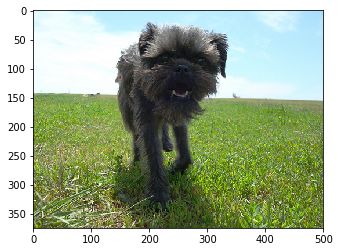

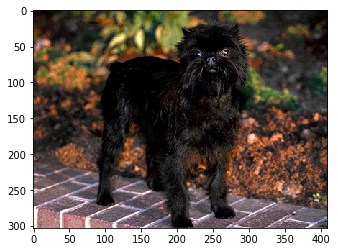

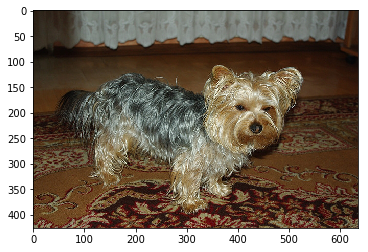

In [33]:
path = './datasets/dogImages/train/'
visualise(path)
path = './datasets/dogImages/train/'
visualise(path, 20)
path = './datasets/dogImages/train/'
visualise(path, 6679)